In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#### Load Data

In [16]:
# Load train/test data (two features per sample, labels in {0,1,2})
base = os.path.join('..', 'HW2') if os.path.basename(os.getcwd()) != 'HW2' else '.'

x_train = pd.read_csv(os.path.join(base, 'X_train.csv'), header=None)
x_test = pd.read_csv(os.path.join(base, 'X_test.csv'), header=None)
y_train = pd.read_csv(os.path.join(base, 'y_train.csv'), header=None)
y_test = pd.read_csv(os.path.join(base, 'y_test.csv'), header=None)

# Quick summaries
print('X_train shape:', x_train.shape)
print('X_test shape :', x_test.shape)

print('y_train shape:', y_train.shape)
print('y_test shape :', y_test.shape)

x_train.head()
y_train.head()

X_train shape: (120, 2)
X_test shape : (30, 2)
y_train shape: (120, 1)
y_test shape : (30, 1)


,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


### Logistic Regression for Binary Classification

In [17]:
# Convert labels: keep 0 as 0, map 1 and 2 to 1 (setosa vs non-setosa)
y_train_binary = y_train[0].apply(lambda v: 0 if v==0 else 1).values
y_test_binary = y_test[0].apply(lambda v: 0 if v==0 else 1).values
y_train_binary


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [18]:
clf = LogisticRegression(solver='liblinear')
clf.fit(x_train.values, y_train_binary)

LogisticRegression(solver='liblinear')

In [19]:
coef = clf.coef_.ravel()
intercept = clf.intercept_[0]
print("Learned coefficients:", coef)
print("Learned intercept:", intercept)

Learned coefficients: [-2.16341028 -1.15570238]
Learned intercept: -0.9797496395153452


In [20]:
train_pred = clf.predict(x_train.values)
test_pred = clf.predict(x_test.values)
train_acc = accuracy_score(y_train_binary, train_pred)
test_acc = accuracy_score(y_test_binary, test_pred)
print(f"Classification Training accuracy: {train_acc:.4f}")
print(f"Classification Test accuracy: {test_acc:.4f}")

Classification Training accuracy: 0.9917
Classification Test accuracy: 1.0000


### Logistic Regression for Binary Classification
(setosa vs. non-setosa)

Learned coefficients: [-2.16341028 -1.15570238]  
Learned intercept: -0.9797496395153452  


Training accuracy: 0.9917  
Test accuracy: 1.0000


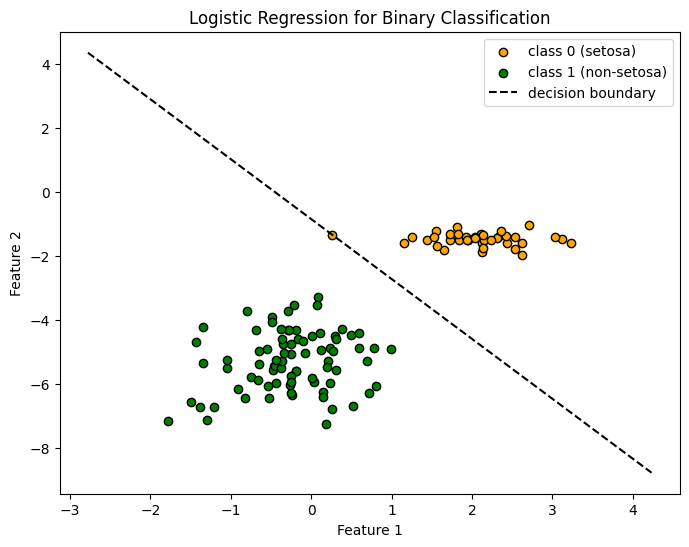

In [21]:
# Plot training samples and decision boundary
plt.figure(figsize=(8,6))
# scatter by class
plt.scatter(x_train.values[y_train_binary==0,0], x_train.values[y_train_binary==0,1], c='orange', label='class 0 (setosa)', edgecolor='k')
plt.scatter(x_train.values[y_train_binary==1,0], x_train.values[y_train_binary==1,1], c='green', label='class 1 (non-setosa)', edgecolor='k')

# plot decision boundary: w0*x + w1*y + b = 0 -> y = -(w0/w1) x - b/w1
coef = clf.coef_.ravel()
intercept = clf.intercept_[0]
if abs(coef[1]) > 1e-6:
    xs = np.linspace(x_train.values[:,0].min() - 1, x_train.values[:,0].max() + 1, 200)
    ys = -(coef[0]/coef[1]) * xs - intercept/coef[1]
    plt.plot(xs, ys, 'k--', label='decision boundary')
else:
    # vertical boundary x = -b/w0
    x0 = -intercept/coef[0]
    plt.axvline(x0, color='k', linestyle='--', label='decision boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression for Binary Classification')
plt.show()

### Logistic Regression with Softmax for Multi-class Classification

In [22]:
# Train multinomial (softmax) logistic regression on the original 3 classes
# y_train and y_test are read above as single-column DataFrames; extract flat arrays
y_train_orig = y_train[0].values
y_test_orig = y_test[0].values

In [23]:
# Create and fit multinomial logistic regression
clf_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
clf_multi.fit(x_train.values, y_train_orig)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [24]:
# Report learned coefficients and intercepts
coefs = clf_multi.coef_  # shape (n_classes, n_features)
intercepts = clf_multi.intercept_  # shape (n_classes,)
for i, (c, b) in enumerate(zip(coefs, intercepts)):
    print(f'Class {i}: coefficients = {c}, intercept = {b}')

Class 0: coefficients = [1.12393584 2.22919459], intercept = 8.245104825434854
Class 1: coefficients = [-0.55527035  0.60345908], intercept = 4.974294036206994
Class 2: coefficients = [-0.56866549 -2.83265367], intercept = -13.219398861641801


In [25]:
# Classification accuracies
train_pred_multi = clf_multi.predict(x_train.values)
test_pred_multi = clf_multi.predict(x_test.values)
train_acc_multi = accuracy_score(y_train_orig, train_pred_multi)
test_acc_multi = accuracy_score(y_test_orig, test_pred_multi)
print(f"Classification Training accuracy: {train_acc_multi:.4f}")
print(f"Classification Test accuracy: {test_acc_multi:.4f}")


Classification Training accuracy: 0.9583
Classification Test accuracy: 1.0000


### Logistic Regression with Softmax for Multi-class Classification
(0: Iris setosa; 1: Iris versicolor ; 2: Iris virginica)  

Class 0: coefficients = [1.12393584 2.22919459], intercept = 8.245104825434854  
Class 1: coefficients = [-0.55527035  0.60345908], intercept = 4.974294036206994  
Class 2: coefficients = [-0.56866549 -2.83265367], intercept = -13.219398861641801  


Classification Training accuracy: 0.9583  
Classification Test accuracy: 1.0000  


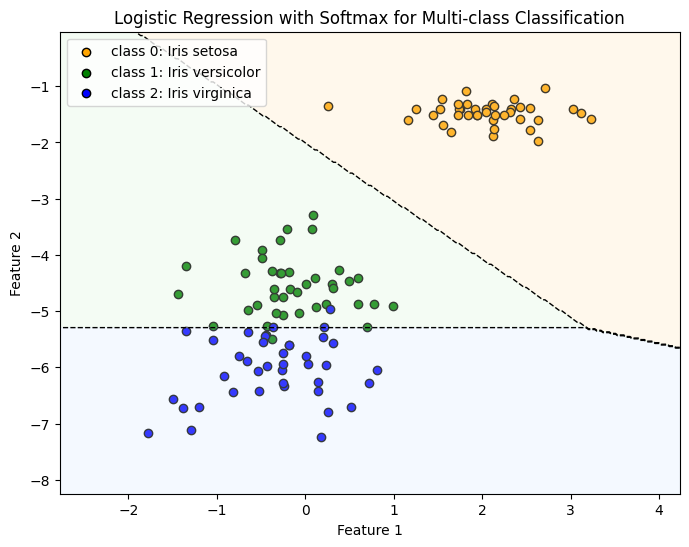

In [26]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8,6))

# Colors and labels for three classes
colors = ['orange', 'green', 'blue']
labels = [0, 1, 2]
labels_str = ["0: Iris setosa" , "1: Iris versicolor",  "2: Iris virginica"]
# Plot training samples by class
for lab, col, lab_str in zip(labels, colors, labels_str):
    mask = (y_train_orig == lab)
    plt.scatter(x_train.values[mask, 0], x_train.values[mask, 1], c=col, label=f'class {lab_str}', edgecolor='k')

# Decision boundaries: plot contours between each pair of classes
cmap_light = ListedColormap(['#FFE5B4', '#D5F5D5', '#D5E8FF'])

x_min, x_max = x_train.values[:,0].min() - 1, x_train.values[:,0].max() + 1
y_min, y_max = x_train.values[:,1].min() - 1, x_train.values[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf_multi.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.25, cmap=cmap_light, levels=[-0.5,0.5,1.5,2.5])
plt.contour(xx, yy, Z, levels=[0.5,1.5], colors='k', linestyles='--', linewidths=1)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression with Softmax for Multi-class Classification')
plt.show()